In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/titanic3.xls")

In [3]:
cols=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [4]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [5]:
print('total:', len(all_df), 'train:', len(train_df), 'test:', len(test_df))

total: 1309 train: 1034 test: 275


In [6]:
def PreprocessData(raw_df):
    df = raw_df.drop(['name'], axis=1)
    
    age_mean  = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    
    fare_mean  = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    
    x_OneHot_df = pd.get_dummies(data=df, columns=["embarked"])
    
    ndarray = x_OneHot_df.values
    Features = ndarray[:, 1:]
    Label = ndarray[:, 0]
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    
    return scaledFeatures, Label

In [7]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units = 40, 
                input_dim = 9,
                kernel_initializer = 'uniform',
                activation = 'relu'))

In [11]:
model.add(Dense(units = 30,
               kernel_initializer = 'uniform',
               activation = 'relu'))

In [12]:
model.add(Dense(units = 1,
               kernel_initializer = 'uniform',
               activation = 'sigmoid'))

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
train_history = model.fit(x = train_Features,
                          y = train_Label,
                          validation_split = 0.1,
                          epochs = 30,
                          batch_size = 30,
                          verbose = 2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 2s - loss: 0.6901 - acc: 0.5774 - val_loss: 0.6713 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6681 - acc: 0.5957 - val_loss: 0.5915 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6101 - acc: 0.6677 - val_loss: 0.4942 - val_acc: 0.8173
Epoch 4/30
 - 0s - loss: 0.5454 - acc: 0.7634 - val_loss: 0.4624 - val_acc: 0.7788
Epoch 5/30
 - 0s - loss: 0.5062 - acc: 0.7624 - val_loss: 0.4552 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.4911 - acc: 0.7645 - val_loss: 0.4399 - val_acc: 0.7788
Epoch 7/30
 - 0s - loss: 0.4823 - acc: 0.7591 - val_loss: 0.4424 - val_acc: 0.7885
Epoch 8/30
 - 0s - loss: 0.4789 - acc: 0.7581 - val_loss: 0.4344 - val_acc: 0.7885
Epoch 9/30
 - 0s - loss: 0.4734 - acc: 0.7645 - val_loss: 0.4274 - val_acc: 0.7885
Epoch 10/30
 - 0s - loss: 0.4697 - acc: 0.7753 - val_loss: 0.4252 - val_acc: 0.8077
Epoch 11/30
 - 0s - loss: 0.4657 - acc: 0.7602 - val_loss: 0.4219 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.4639 - acc:

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

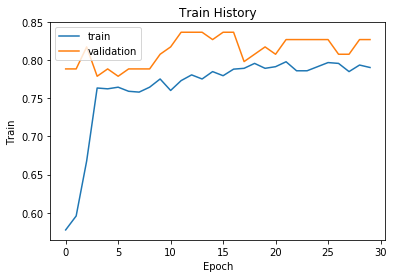

In [17]:
show_train_history(train_history, 'acc', 'val_acc')

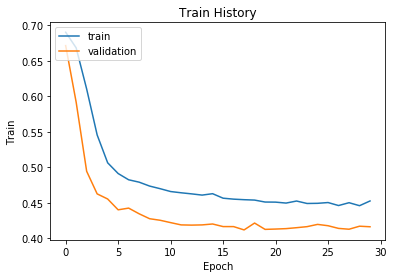

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [19]:
scores = model.evaluate(x = test_Features, y = test_Label)

275/275 [==============================] - 0s 95us/step


In [20]:
scores[1]

0.8109090913425793

In [21]:
Jack = pd.Series([0,'Jack',3,'male'  ,23,1,0,  5.0000,'S'])
Rose = pd.Series([1,'Rose',1,'female',20,1,0,100.0000,'S'])

In [22]:
JR_df = pd.DataFrame([list(Jack), list(Rose)], 
                     columns = ['survived', 'name', 'pclass', 'sex', 'age', 
                                 'sibsp', 'parch', 'fare', 'embarked'])

In [23]:
all_df = pd.concat([all_df, JR_df])

In [24]:
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [25]:
all_Features, Label = PreprocessData(all_df)

In [26]:
all_probability = model.predict(all_Features)

In [27]:
all_probability[:10]

array([[0.97696316],
       [0.609896  ],
       [0.9721666 ],
       [0.40561366],
       [0.97113806],
       [0.2749112 ],
       [0.9495579 ],
       [0.32654467],
       [0.94781196],
       [0.29248822]], dtype=float32)

In [28]:
pd = all_df
pd.insert(len(all_df.columns), 'probability', all_probability)

In [29]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.150749
1,1,Rose,1,female,20.0,1,0,100.0,S,0.969594


In [30]:
pd[(pd['survived'] == 0) & (pd['probability']>0.9) ]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.972167
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971138
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.977837
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.975898
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.962791


In [31]:
pd[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.976963
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.609896
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972167
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.405614
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.971138
